# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 


from scipy import stats

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food=pd.read_excel("data/food_consumption.xlsx")
food.head(3)

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [4]:
food.isnull().sum() * 100 / len(food)
#excellent: there is no nan

country          0.0
food_category    0.0
consumption      0.0
co2_emission     0.0
dtype: float64

1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [5]:
food.groupby('food_category')['consumption'].describe().sort_values("50%", ascending=False)

#dairy has the highest median value of food_consumption

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


**Answer 1: dairy has the highest median value of food_consumption**

<AxesSubplot:xlabel='consumption', ylabel='food_category'>

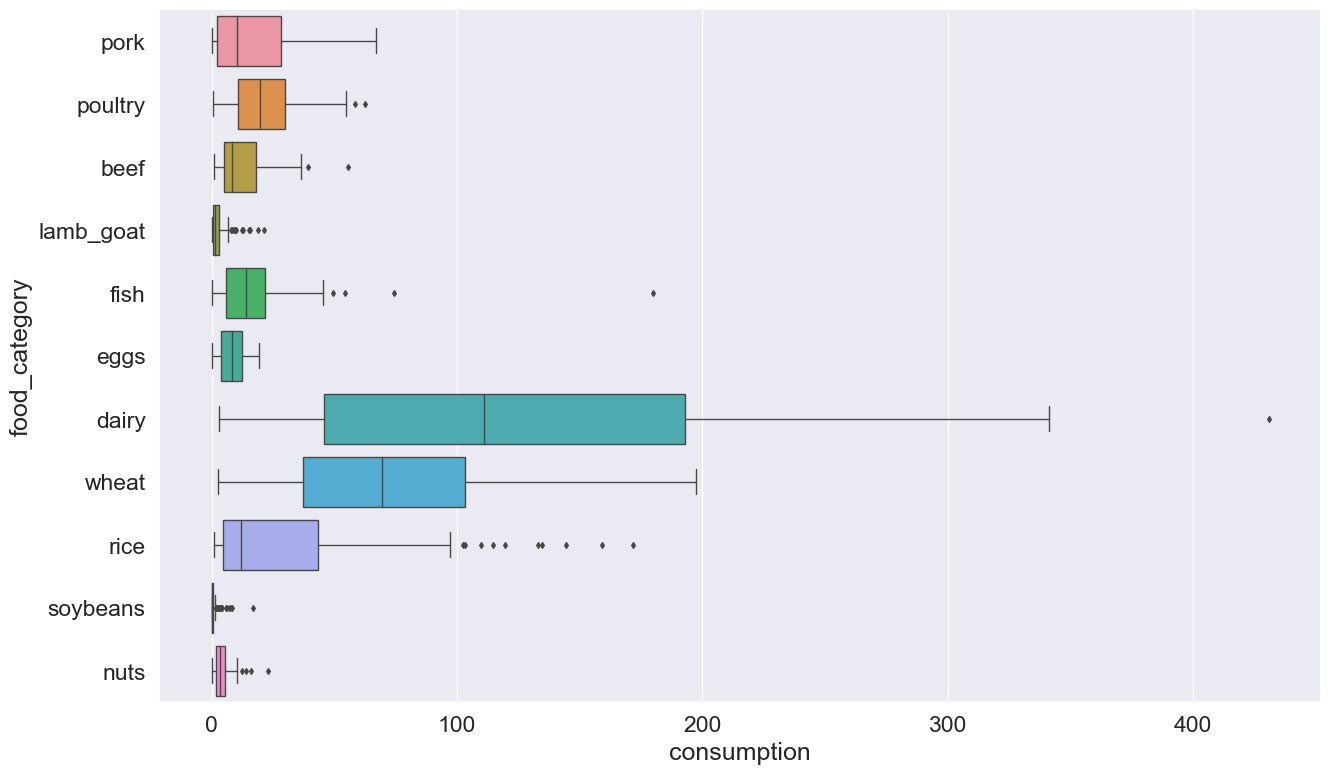

In [6]:
#double-check with graphs that dairy is indeed the variable with the highest median of food consumption
sns.boxplot(x = 'consumption', y = 'food_category', data = food, fliersize=3, linewidth=1)

#sns.stripplot(x = 'consumption', y = 'food_category', data = food, hue='food_category', legend=False)

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

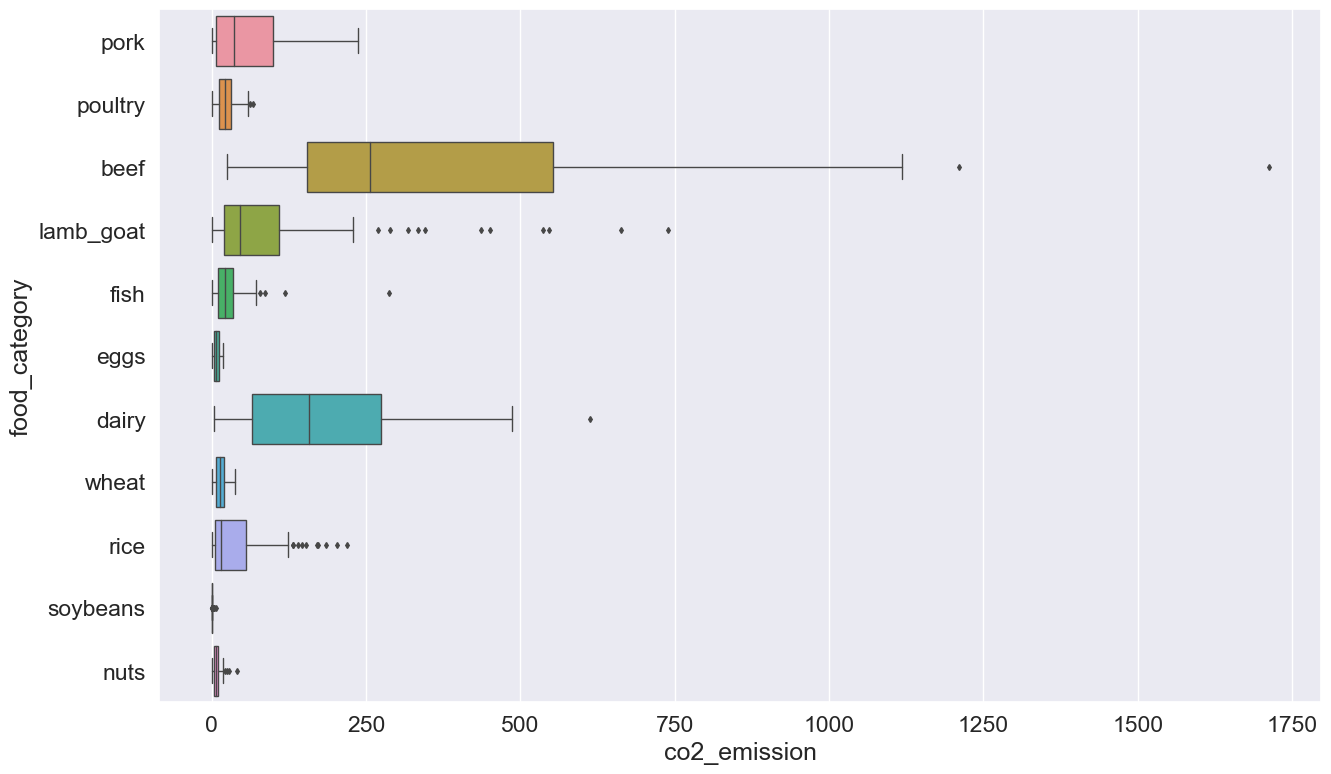

In [7]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)
#beef has the higher IQR (i.e., longest "box")

**Answer 2: beef has the higher IQR (i.e., longest "box")**

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [8]:
#beef is also the food_category with the highest median co2_emission value

**Answer 3: beef is also the food_category with the highest median co2_emission value**

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [9]:
#define mu difference
mu_poultry = round(np.mean(food['consumption'][(food['food_category']=='poultry')]),2)
print('avg poultry consumption',mu_poultry) #poulty
mu_fish = round(np.mean(food['consumption'][(food['food_category']=='fish')]),2)
print('avg fish consumption',mu_fish) #fish
mu_diff = round(mu_poultry - mu_fish,2)
print(mu_diff)


avg poultry consumption 21.22
avg fish consumption 17.29
3.93


In [10]:
#here I remove from the dataset all the food category that is different from poultry and fish
food=food.loc[food['food_category'].isin(["fish","poultry"])]
food=food.reset_index()

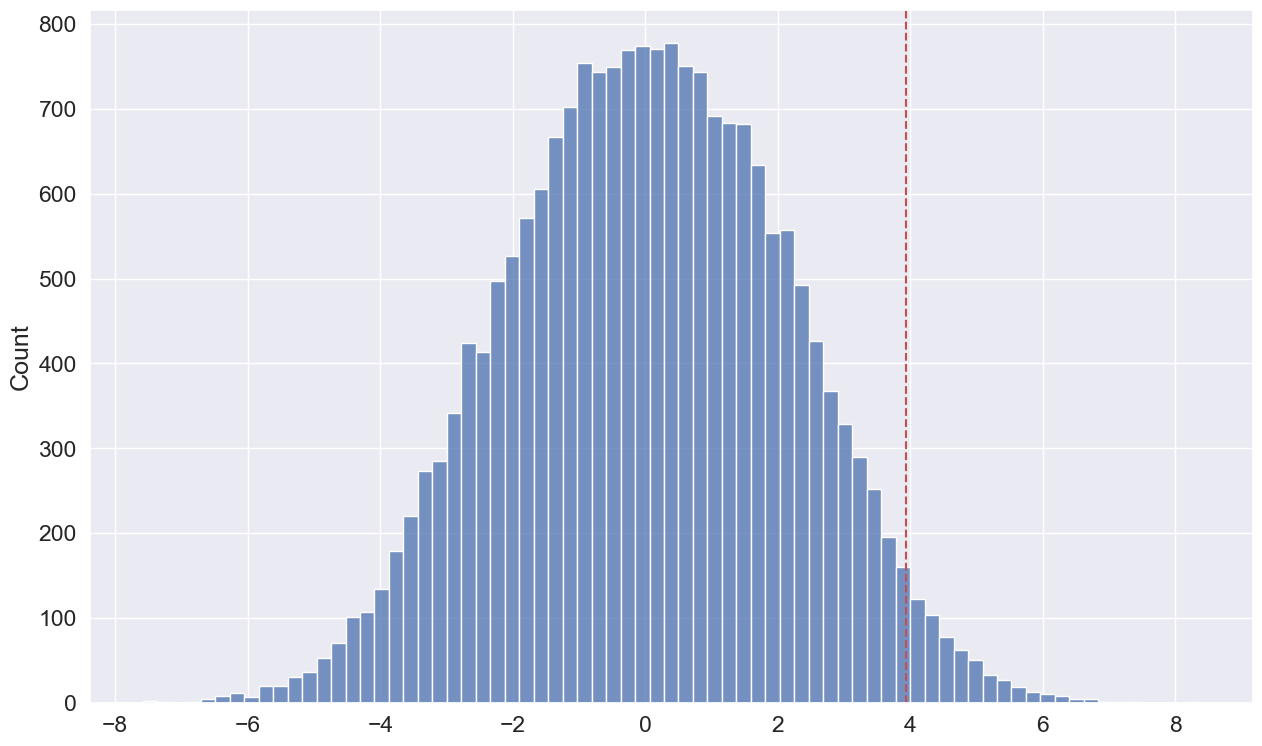

Values more extreme than observed: 579
p-value: 0.02895
H0 rejected | the observed result is statistically significant | p-value <= alpha


In [11]:
mu_diff_samples = []
for i in range(20000): 
      # extract a subsample of 50% of data without replacement
    df_sample1 = food.sample(frac=0.5, replace=False)
        # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(food.index) - set(df_sample1.index)
        # create dataframe with other 50% of data
    df_sample2 = food.iloc[list(ix2)]
        # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1["consumption"]) - np.mean(df_sample2["consumption"])
        # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)
    
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
    
print('Values more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))

p_value = sum([el > mu_diff for el in mu_diff_samples])/20000
print('p-value:', p_value)
    
if p_value <= 0.05: 
    print('H0 rejected | the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')
        

**Answer 4: I reject the null hypothesis because I chose an alpha of 0.05 at the beginning and the test got me a p value of 0.029**

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [12]:
happy=pd.read_excel("data/world_happiness.xlsx")
happy.head(3)

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153


In [13]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [14]:
#check for percentage of NaN per variable
happy.isnull().sum() * 100 / len(happy)

country            0.000000
social_support     0.699301
freedom            0.699301
corruption         5.594406
generosity         0.699301
gdp_per_cap        0.000000
life_exp           0.000000
happiness_score    0.000000
dtype: float64

5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

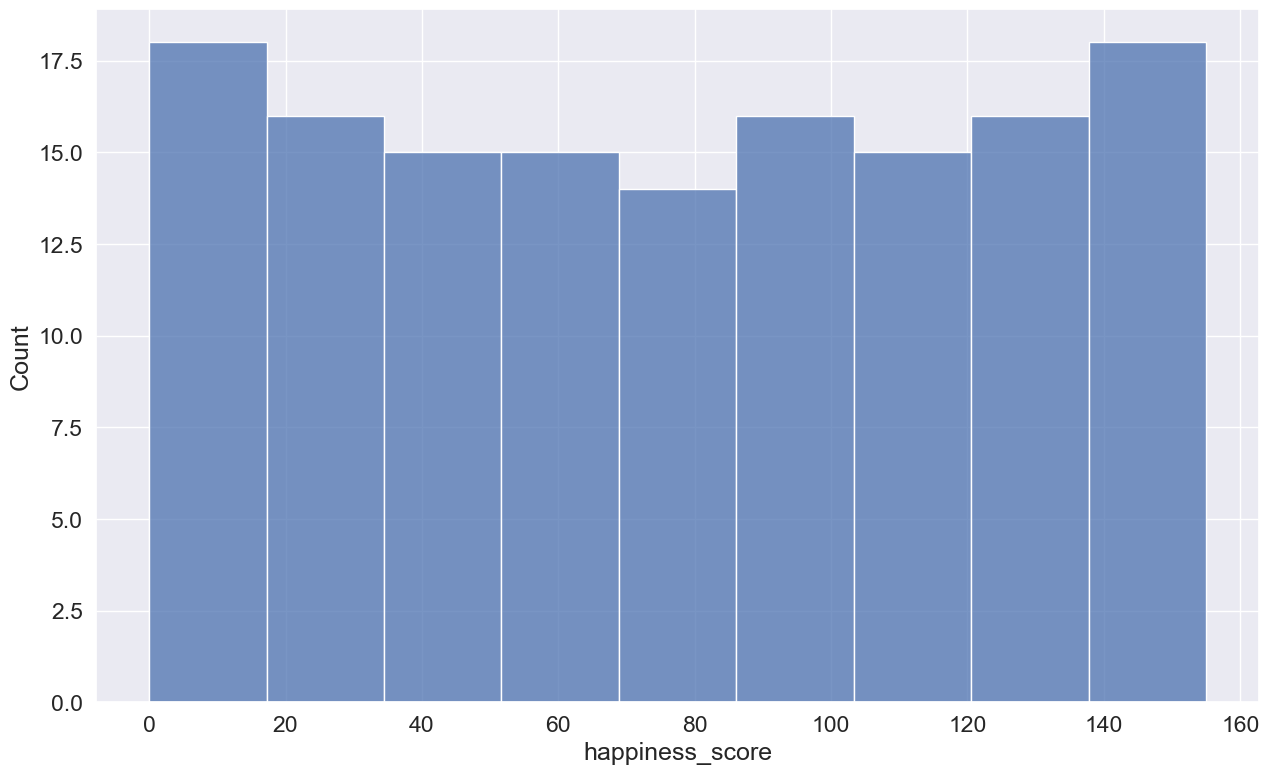

In [15]:
#histogram
sns.histplot(happy['happiness_score'])
plt.show()

#it seems a uniform distribution

**Answer 5: both histogram and qq plot confirm that it is a uniform distribution**

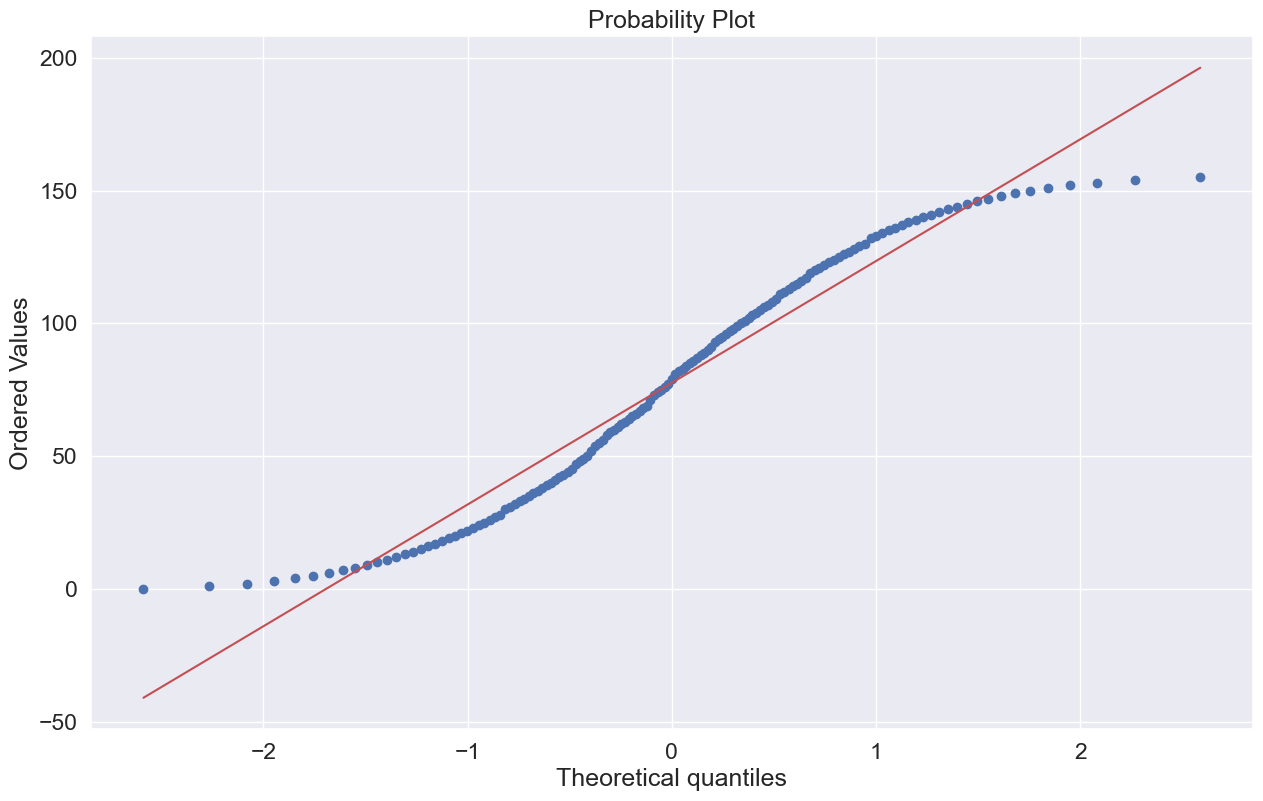

In [16]:
#qq plot
stats.probplot(happy['happiness_score'], dist="norm", plot=plt)
plt.show()

#qqplot confirms that it seems a uniform distribution.

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [17]:
#correlation matrix
happy.corr()

#less correlated is corruption

C:\Users\valentib\AppData\Local\Temp\ipykernel_4488\1766253739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy.corr()


,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


**Answer 6: `corruption` is the variable that is the least correlated with `happiness_score`**

C:\Users\valentib\AppData\Local\Temp\ipykernel_4488\3288854218.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


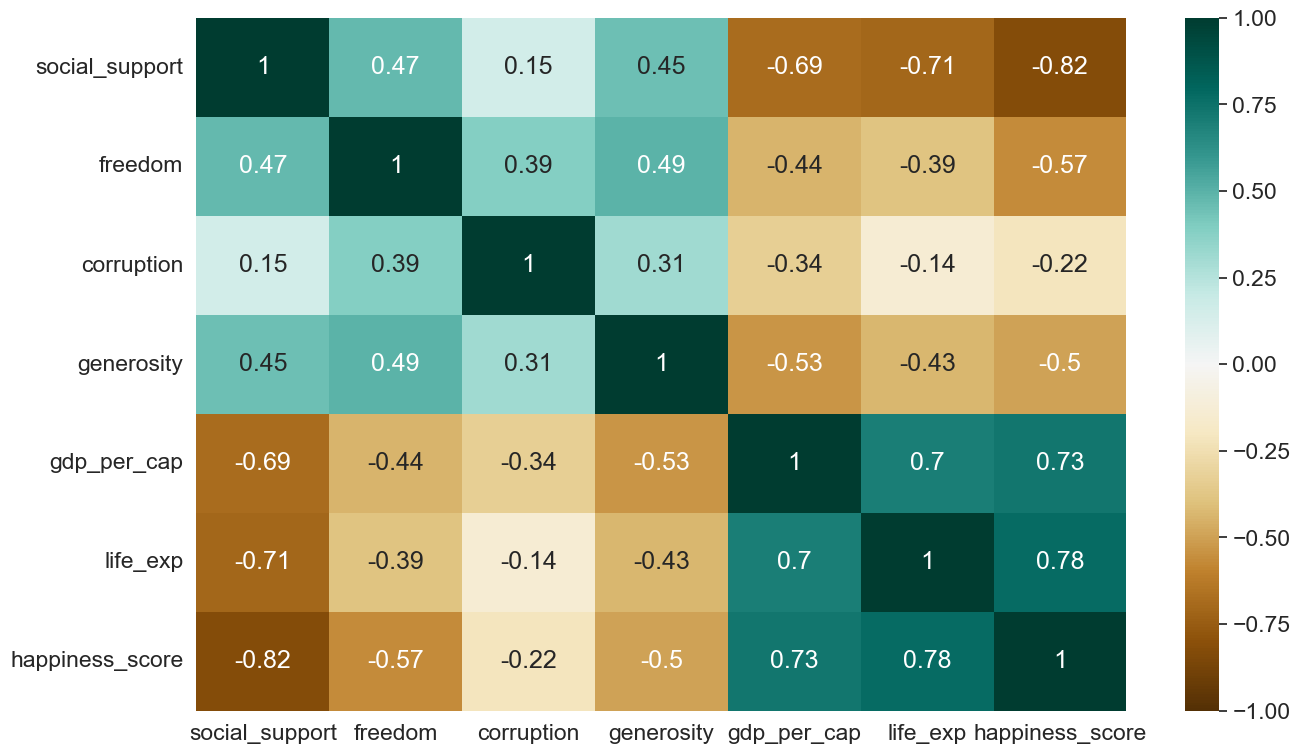

In [18]:
#correlation heatmap
sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

#confirm with corruption

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [19]:
happy['corruption'].isnull().sum()
#8 countries have a missing corruption value

8

In [20]:
happy[happy.isna().any(axis=1)]
#print the 8 countries as a double-check

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


**Answer 7: 8 countries have a missing value for `corruption`**

In [21]:
#just a few checks to see if it makes sense to use the mean as a missing value
print(max(happy['corruption'])-min(happy['corruption']))
print(np.mean(happy['corruption']))
print(np.nanmedian(happy['corruption']))

#I think yes because the range doesn't look huge and the mean is similar to the median

147.0
73.24444444444444
74.0


In [22]:
#first I replace NaN in the corruption column
happy['corruption']=happy.corruption.fillna(happy.corruption.mean())

In [23]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [24]:
#it worked
happy.isnull().sum() * 100 / len(happy)

country            0.000000
social_support     0.699301
freedom            0.699301
corruption         0.000000
generosity         0.699301
gdp_per_cap        0.000000
life_exp           0.000000
happiness_score    0.000000
dtype: float64

In [25]:
#second I replaced the NaN on the rest of the columns
for i in ['social_support','freedom','generosity']:
    happy[i]=happy[i].fillna(happy[i].mean())
    

#this is to double check that all NaN have been replaced (place this in the for cycle to test the cycle is working)
happy.isnull().sum() * 100 / len(happy)

country            0.0
social_support     0.0
freedom            0.0
corruption         0.0
generosity         0.0
gdp_per_cap        0.0
life_exp           0.0
happiness_score    0.0
dtype: float64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

<AxesSubplot:xlabel='life_exp', ylabel='happiness_score'>

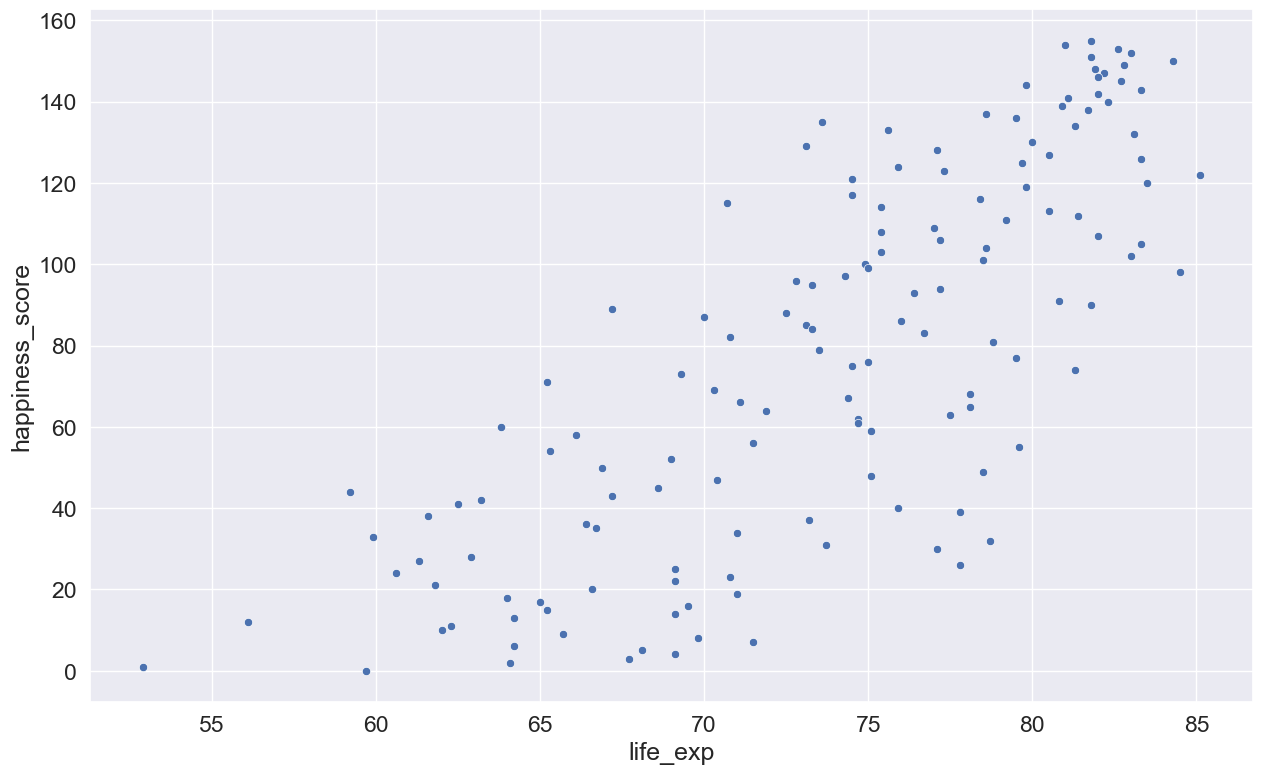

In [26]:
#first of all some pictures to see if a simple linear regression model would make sense
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

In [27]:
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)   # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.59e-30
Time:                        15:26:01   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#this model is not great, R squared of 0.61
#but overall life exp is significative (p<.001) : good news
#Condition number is high but I won't problem about it too much because it is a simple regression.

#ans: a 1-year increase in life expectancy correspond roughly to an increase of 5.1021 points in the happyness score.

**Answer 8: a 1-year increase in life expectancy correspond roughly to an increase of 5.1021 points in the happyness score.**

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [29]:
#they ask to split the dataset first and then train a linear regression model but I do not think 
#it is possible. I first create the predictors

X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
#I think the question asks to do regression with sklearn. I am more comfortable with 
#statsmodel so I'll first do it with sklearn and then double check values with statsmodel
reg = LinearRegression().fit(X,Y)
print("the intercept is", reg.intercept_)
print("the coefficients are",reg.coef_)

the intercept is -47.322619838065805
the coefficients are [ 0.         -0.46205094 -0.19179296 -0.04215969  2.42282566]


In [32]:
y_pred=reg.predict(X_train)  #pred_train

In [33]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)
#R squared based on train test : 0.78

0.7799718879143551

In [34]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)
#R squared based on test test : 0.80

0.8024288238233568

**Answer 9: because the R square doesn't change too much between train and test, I would say it is not overfitting**

In [35]:
####################################################################################
#alternatively, linear regression with sm (easier to find & doublecheck the R squared)
model = sm.OLS(endog=y_train,exog=X_train)
results = model.fit()
results.summary()
#R squared based on train test : 0.78

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.39e-29
Time:                        15:26:01   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#R squared on the test dataset
model = sm.OLS(endog=y_test,exog=X_test)
results = model.fit()
results.summary()
#R squared based on test test : 0.80

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     50.64
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.01e-15
Time:                        15:26:01   Log-Likelihood:                -209.39
No. Observations:                  48   AIC:                             428.8
Df Residuals:                      43   BIC:                             438.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.6747     49.345     -2.952      0.005    -245.188     -46.161
social_support    -0.3854      0.102     -3.791      0.000      -0.590      -0.180
freedom           -0.2358      0.080     -2.933      0.005      -0.398      -0.074
generosity        -0.0066      0.082     -0.080      0.936      -0.172       0.159
life_exp           3.6813      0.589      6.251      0.000       2.494       4.869
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.815
Skew:                          -0.292   Prob(JB):                        0.404
Kurtosis:                       2.248   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#No, I don't think the model is overfitting because the R squared of train data is not too much higher than test 
#However, it is not a great model theoretically (some variables are not significant)
#Also, the multicollinearity is a big problem (Cond No. very high)

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [38]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [39]:
y_pred=reg.predict(X_test) 
print('Testing MAE:', mae(y_test, y_pred))

Testing MAE: 16.92


In [40]:
#I'm not satisfied with the model, the MAE is quite high
print(min(y_test), max(y_test))

10 155


**Answer 10: MAE is of 16.92, I am not satisfied (model could be improved)**

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [41]:
print(X.columns[1:5])
print("the coefficients are",reg.coef_[1:5])

#it is bizarre that the happiness score decreases when social support, freedom and generosity decrease.

Index(['social_support', 'freedom', 'generosity', 'life_exp'], dtype='object')
the coefficients are [-0.46205094 -0.19179296 -0.04215969  2.42282566]


**Answer 11: it is bizarre `happiness_score`  decreases when `social support`, `freedom` and `generosity` decrease.**

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

C:\Users\valentib\AppData\Local\Continuum\anaconda3\envs\booleanenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:26:02 - cmdstanpy - INFO - Chain [1] start processing
15:26:02 - cmdstanpy - INFO - Chain [1] done processing


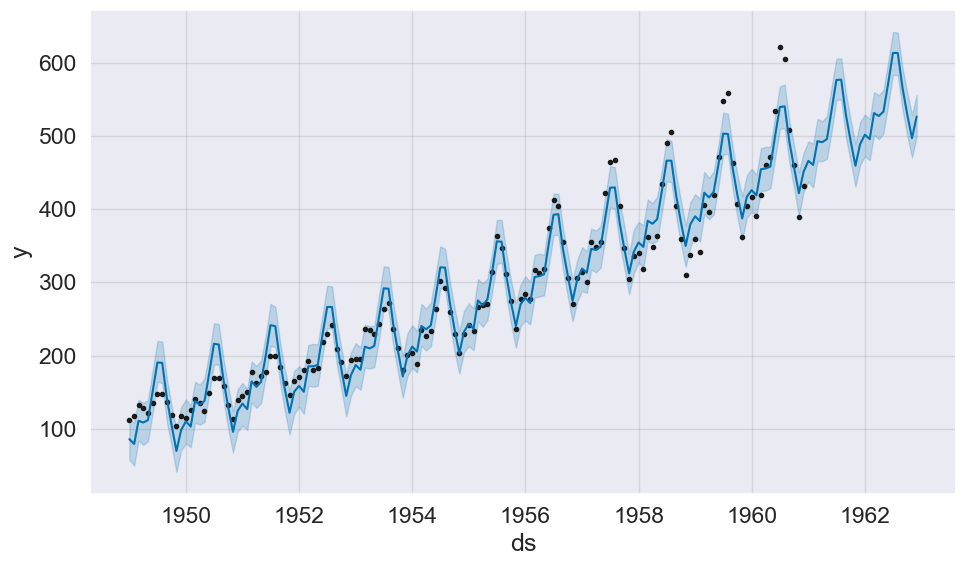

In [42]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel('data/air-passengers.xlsx')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [43]:
df['month'] = df['ds'].dt.month 
df['year'] = df['ds'].dt.year
df.head()

,ds,y,month,year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


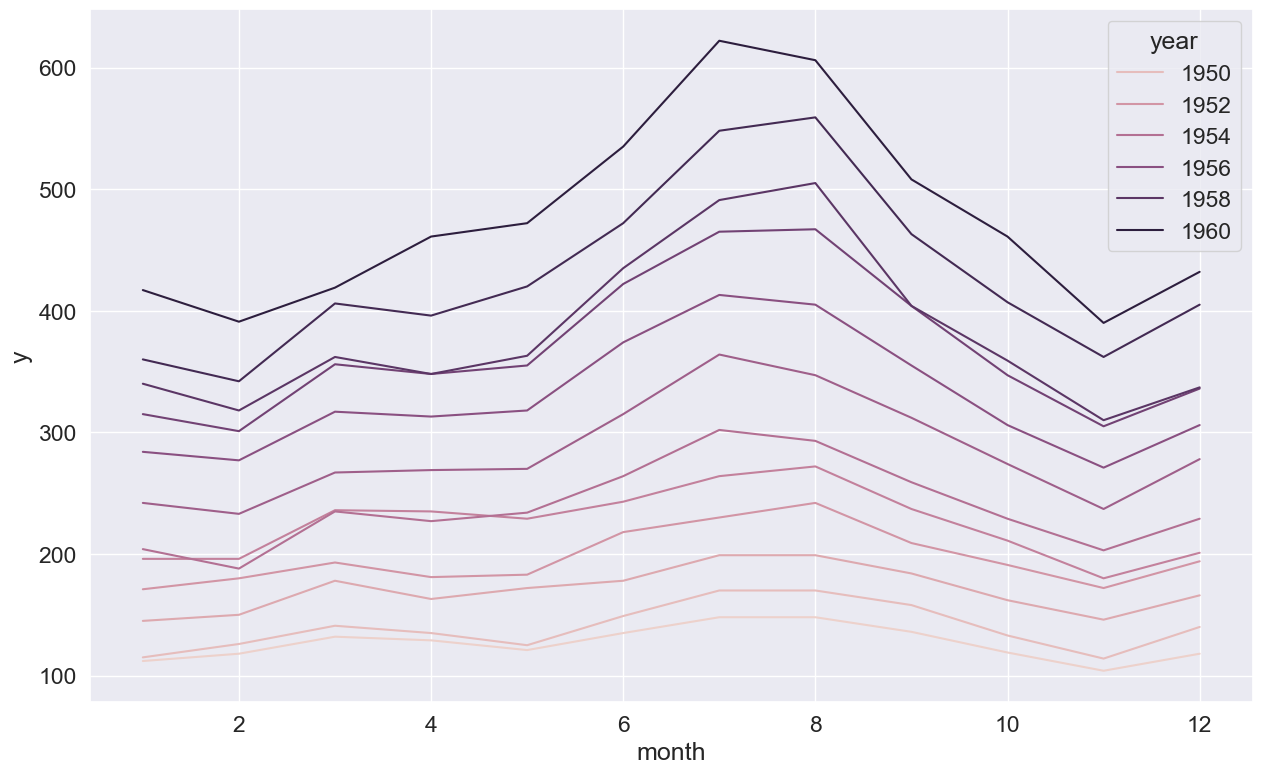

In [44]:
#first idea of what the seasonality looks like
sns.lineplot(x='month', y='y', hue='year', data=df)
plt.show()

15:26:03 - cmdstanpy - INFO - Chain [1] start processing
15:26:03 - cmdstanpy - INFO - Chain [1] done processing


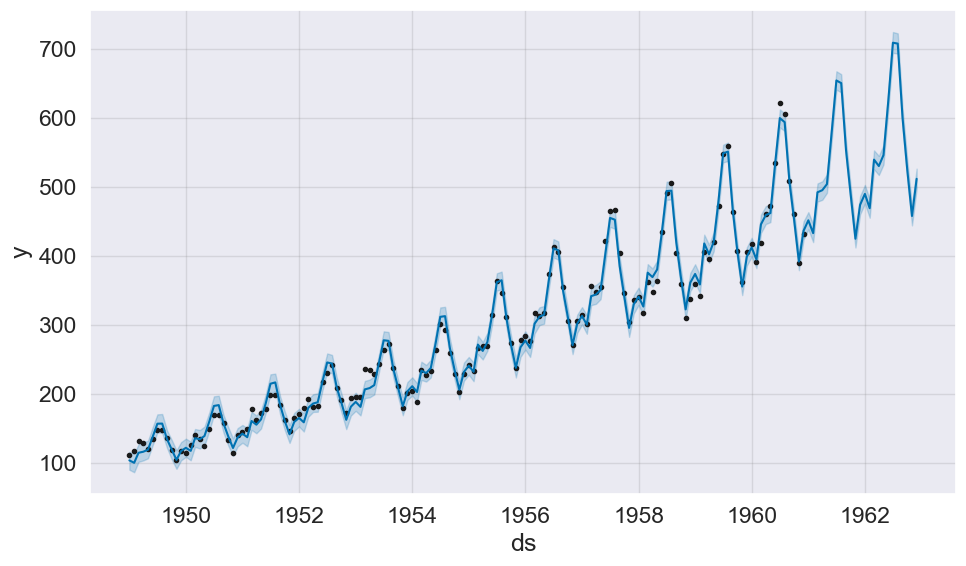

In [45]:
#edit this to account for the effect of  growing seasonality
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

**Answer 12: I changed the model from additive to multiplicative**